In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

deals = pd.read_parquet('deals.parquet')
companies = pd.read_parquet('companies.parquet')

# DEALS exploration


In [3]:
deals.head()

,CompanyID,CompanyName,DealNo,DealDate,AnnouncedDate,DealSize,DealStatus,DealSizeStatus,PremoneyValuation,PostValuation,...,Debts,DebtRaisedInRound,ContingentPayout,Employees,BusinessStatus,FinancingStatus,SiteLocation,ExitScope,RowID,LastUpdated
DealID,,,,,,,,,,,,,,,,,,,,,
247042-45T,515209-69,Gridflex Energy,2,2025-04-30,NaT,50.793247,Upcoming,Estimated,NaN,169.310582,...,None,NaN,NaN,NaN,Generating Revenue,Pending Transaction (M&A),"Boise, ID",None,7fbfd5b0377ea28524fb9aa29a4d7dc69b77cd4afa9313...,2024-05-07
256383-64T,593468-20,Personal Protective Equipment Business),1,2025-03-31,2024-04-07,640.000000,Upcoming,Actual,NaN,640.000000,...,None,NaN,NaN,NaN,Generating Revenue,Pending Transaction (M&A),"Rosewell, GA",None,edb67b8eea39fd78af875c8ff473c58e5fdf8a12c637ee...,2024-04-15
256415-23T,281224-09,Ammobia,6,2025-01-01,NaT,NaN,Upcoming,None,NaN,NaN,...,None,NaN,NaN,NaN,Generating Revenue,Pending Transaction (VC),"San Francisco, CA",None,84cdba37bb3ae584496b965a8d9991fcecc4f14eced0ce...,2024-04-08
248160-07T,314645-86,ShiraTronics,3,2024-12-31,2023-08-30,NaN,Upcoming,None,NaN,NaN,...,None,NaN,NaN,NaN,Clinical Trials - General,Pending Transaction (VC),"Minneapolis, MN",None,acd0b487f283c8afef61424303ee5aa1a851614254e55b...,2023-12-22
255261-25T,61985-89,American Express Global Business Travel,9,2024-12-31,NaT,71.700000,Upcoming,Actual,NaN,NaN,...,None,NaN,NaN,NaN,Generating Revenue,Pending Transaction (M&A),"New York, NY",None,29a67feb98cf3ff10d6158545ed70b976df00f6e9720d2...,2024-04-22


In [5]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30680 entries, 247042-45T to 60266-26T
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CompanyID             30680 non-null  object        
 1   CompanyName           30680 non-null  object        
 2   DealNo                30680 non-null  int64         
 3   DealDate              29061 non-null  datetime64[ns]
 4   AnnouncedDate         10417 non-null  datetime64[ns]
 5   DealSize              25144 non-null  float64       
 6   DealStatus            30680 non-null  object        
 7   DealSizeStatus        24963 non-null  object        
 8   PremoneyValuation     10357 non-null  float64       
 9   PostValuation         12684 non-null  float64       
 10  PostValuationStatus   12313 non-null  object        
 11  PercentAcquired       12831 non-null  float64       
 12  RaisedToDate          25425 non-null  float64       
 13  VCRound 

In [4]:
deals.iloc[0]

CompanyID                                                       515209-69
CompanyName                                               Gridflex Energy
DealNo                                                                  2
DealDate                                              2025-04-30 00:00:00
AnnouncedDate                                                         NaT
DealSize                                                        50.793247
DealStatus                                                       Upcoming
DealSizeStatus                                                  Estimated
PremoneyValuation                                                     NaN
PostValuation                                                  169.310582
PostValuationStatus                                             Estimated
PercentAcquired                                                      30.0
RaisedToDate                                                          NaN
VCRound                               

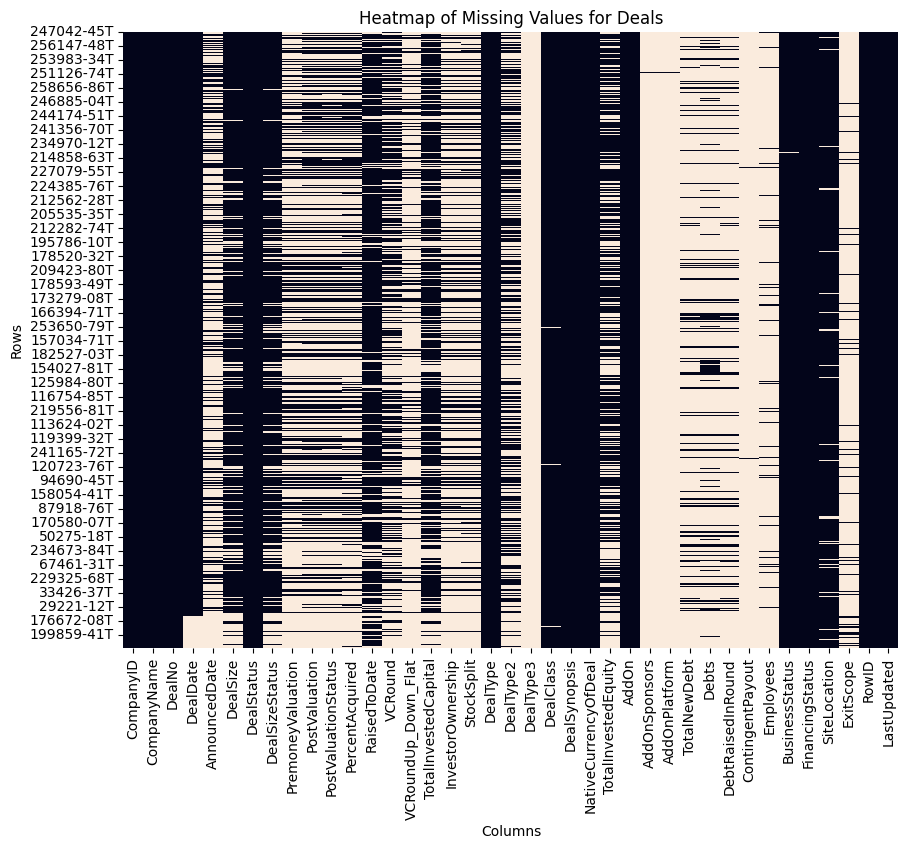

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(deals.isnull(), cbar=False)
plt.title('Heatmap of Missing Values for Deals')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [ ]:
deals.select_dtypes(include=['float64']).describe()
# potentially log everything but contingent payout? 

,DealSize,PremoneyValuation,PostValuation,PercentAcquired,RaisedToDate,TotalInvestedCapital,InvestorOwnership,TotalInvestedEquity,TotalNewDebt,DebtRaisedInRound,ContingentPayout,Employees
count,25144.000000,10357.000000,12684.000000,12831.000000,25425.000000,22402.000000,8787.000000,17333.000000,4530.000000,4533.000000,155.000000,2383.000000
mean,171.699154,244.394620,510.766002,40.418216,424.631197,81.529253,48.959077,46.132435,282.749208,282.578303,109.276716,607.671842
std,1305.616956,1597.796726,2773.326023,32.243923,2613.805591,354.353021,18.988938,238.174420,682.175683,681.987544,350.034516,3047.778217
min,0.000033,0.013013,0.032500,0.005000,0.001000,0.000033,0.625016,0.001000,0.001144,0.000000,0.190000,0.000000
25%,3.000000,11.999996,19.500001,16.960000,6.000000,2.594863,34.564417,3.598630,2.751198,2.750000,5.278272,10.000000
50%,10.138112,31.000000,54.043151,28.570000,22.890545,9.098380,48.521226,9.962489,21.982500,21.800000,15.207355,30.000000
75%,47.000000,100.000000,195.000000,51.000000,105.250000,32.000000,62.848347,28.000000,275.461250,275.000000,75.000000,140.000000
max,75400.000000,85800.000000,85800.000000,100.000000,79586.000000,13000.000000,99.582394,12800.000000,13000.000000,13000.000000,3750.000000,61000.000000


In [3]:
deals['Debts'].isna().sum()

24737

In [7]:
deals['TotalNewDebt'].describe()

count     4530.000000
mean       282.749208
std        682.175683
min          0.001144
25%          2.751198
50%         21.982500
75%        275.461250
max      13000.000000
Name: TotalNewDebt, dtype: float64

In [8]:
deals['DebtRaisedInRound'].describe()

count     4533.000000
mean       282.578303
std        681.987544
min          0.000000
25%          2.750000
50%         21.800000
75%        275.000000
max      13000.000000
Name: DebtRaisedInRound, dtype: float64

In [121]:
deals['DealStatus'].unique()

array(['Upcoming', 'Announced/In Progress', 'Completed',
       'Failed/Cancelled', 'Rumor/Speculation', 'In Bidding Process',
       'Postponed'], dtype=object)

In [74]:
deals['ExitScope'].unique()

array([None, 'VC EXIT', 'PE EXIT'], dtype=object)

In [58]:
deals['PostValuationStatus'].unique()

array(['Estimated', None, 'Actual'], dtype=object)

In [36]:
deals['NativeCurrencyOfDeal'].unique()

array(['South-Korean Won (KRW)', 'US Dollars (USD)',
       'Canadian Dollars (CAD)', 'Euros (EUR)', 'Japanese Yen (JPY)',
       'India Rupees (INR)', 'British Pounds (GBP)',
       'Australian Dollars (AUD)', 'Chinese Yuan RMB (CNY)',
       'Malaysian ringgit (MYR)', 'Russian Ruble (RUB)',
       'Norwegian Krone (NOK)', 'Taiwan Dollar (TWD)',
       'Israeli Shekels (ILS)', 'Danish Kroner (DKK)',
       'Brazil Real (BRL)', 'South African Rand (ZAR)',
       'Swiss Francs (CHF)', 'New Zealand Dollar (NZD)',
       'Singapore Dollar (SGD)', 'Czech Krona (CZK)',
       'United Arab Emirates dirham (AED)', 'Zambian Kwacha (ZMW)',
       'Swedish Krona (SEK)'], dtype=object)

In [24]:
deals['PostValuationStatus'].unique()

array(['Estimated', None, 'Actual'], dtype=object)

In [23]:
deals['DealSizeStatus'].unique()

array(['Estimated', 'Actual', None], dtype=object)

In [20]:
deals['AddOn'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
deals['AddOnPlatform'].unique()

array([None, 'Osaic', 'Emerald Technologies', 'Antero Midstream Partners',
       'Nuance Medical', 'Benchmark Energy (Texas)',
       'Armis (San Francisco)', 'BeyondTrust', 'Fanatics', 'Zinnia',
       'Vallen', 'TICE Chicken Holdings', 'Shearer Supply',
       'Road Safety Services', 'Greene Group Industries',
       'Theodore Alexander', 'Aldinger (Dallas)', 'Level Access',
       'Software Mind', 'MI Windows and Doors', 'IBS Software',
       'Cameron Ashley Building Products', 'Vessco',
       'Pacific Trellis Fruit', 'Two Circles', 'Executive Platforms',
       'Kelso Industries', '4M Building Solutions', 'AmWINS',
       'US LBM Holdings', 'AlpineX', 'Valsoft Corporation',
       'Octopus Deploy', 'Madison Industries', 'FirstCall Mechanical',
       'Frontier Dental Laboratories', 'PrimeRx', 'ExperiGreen Lawn Care',
       'Iconic Artists Group', 'Symplr', 'Beamer',
       'United Air Temp, Air Conditioning and Heating',
       'Mauser Packaging Solutions', 'AHEAD', 'Instructur

In [22]:
deals['AddOnSponsors'].unique()

array([None, 'ACE & Company, Reverence Capital Partners',
       'Crestview Partners', 'Yorktown Partners',
       'MD Holdings, Medallion Capital, The Operand Group, WSC & Company',
       'McArron Partners',
       'Brookfield Growth, CapitalG, Georgian, Insight Partners, One Equity Partners, Pantheon, Pennsylvania Public School Employees Retirement System, StepStone Group, Temasek Holdings',
       'Clearlake Capital Group, Francisco Partners, NB Private Equity Partners, Olam Capital',
       'Ames Watson, Andreessen Horowitz, BlackRock, Blackstone, Clearlake Capital Group, DFO Management, Fidelity Investments, Fidelity Management & Research, Franklin Templeton, Franklin Venture Partners, Insight Partners, Intersection Growth Partners, LionTree, Loka Capital, Neuberger Berman, Qatar Investment Authority, Reimagined Ventures, Silver Lake, SoftBank Investment Advisers, Thrive Capital',
       'Eldridge Industries', 'Nautic Partners', 'AIM Associates Capital',
       'Investcorp, PNC R

In [18]:
deals['BusinessStatus'].unique()

array(['Generating Revenue', 'Clinical Trials - General', 'Profitable',
       None, 'Startup', 'Product In Beta Test', 'Pre-Clinical Trials',
       'Generating Revenue/Not Profitable', 'Clinical Trials - Phase 3',
       'Clinical Trials - Phase 2', 'Bankruptcy: Admin/Reorg',
       'Product Development', 'Out of Business', 'Stealth',
       'Clinical Trials - Phase 1', 'Bankruptcy: Liquidation', 'Restart',
       'Clinical Trials - Phase 4'], dtype=object)

In [19]:
deals['FinancingStatus'].unique()

array(['Pending Transaction (M&A)', 'Pending Transaction (VC)',
       'Pending Transaction (PE)', 'Corporation',
       'Venture Capital-Backed', 'Formerly VC-backed',
       'Private Equity-Backed', 'Corporate Backed or Acquired',
       'Formerly PE-Backed', 'Failed Transaction (M&A)',
       'Formerly Angel backed', 'Private Debt Financed',
       'Formerly Private Debt Financed', 'Pending Transaction (Debt)',
       'Formerly Accelerator/Incubator backed',
       'Pending Transaction (Angel)', None, 'Angel-Backed',
       'Failed Transaction (PE)', 'Accelerator/Incubator Backed',
       'Failed Transaction (VC)', 'Potential Target',
       'Failed Transaction (Angel)'], dtype=object)

In [120]:
deals['StockSplit'].unique()

array([None, '1:1', '3:1', '100:1', '10:1', '1:20', '1:16.667', '1:9',
       '1:2', '30:1', '500:1', '1000:1', '1:4', '4:1', '1:5', '13.5685:1',
       '5:1', '1:1.2', '1:5.141', '1:6', '1:3.922668', '1:100', '1:6.82',
       '1:24752441', '1:0.713506', '1:3', '1:5.6955', '1:50', '3.4:1',
       '1:40', '20:1', '50:1', '1:22', '1:17', '1:15.969236', '1:9.5',
       '2.300313:1', '2.88:1', '445:1', '1:2.432', '1300000:1',
       '1:2.5161', '1:1.581804', '1.8249:1', '1:7.039', '1:500', '1:250',
       '1:6.178', '1:1.23453', '0.168466:1', '1.68:1', '1:9.3197',
       '1:13.9549', '1:8.4335', '1:3.55092', '1:1.247', '1:2.1095',
       '1:700', '1:34.483', '1:2.1703', '1:12', '1:6.6084', '1:4.7',
       '1:8', '661500:1', '1:1.2987', '1:9.1908', '55.2486:1',
       '1.534387:1', '1:12.2', '1:4.9175', '1:4.5', '1:10', '1.2:1',
       '0.7378:1', '9:1', '1:3.29', '2:1', '1:2.33839', '1:2.58398',
       '2.2:1', '6.684195:1', '237:1', '2.6975:1', '1:3.75', '1:200',
       '709977:1', '26.95

In [11]:
deals['VCRound'].unique()

array([None, '2nd Round', '3rd Round', '4th Round', '1st Round', 'Angel',
       '7th Round', '6th Round', '5th Round', '8th Round', '9th Round',
       '10th Round', '11th Round', '15th Round', '12th Round',
       '14th Round', '13th Round', '17th Round', '16th Round'],
      dtype=object)

In [12]:
deals['VCRoundUp_Down_Flat'].unique()

array([None, 'Down Round', 'Up Round', 'Flat Round'], dtype=object)

In [9]:
deals['DealSynopsis'].iloc[0]
# maybe scrape this information? check if useful

'The company is in talks to be acquired by SK Gas (KRX: 018670) for $69.7 billion on December 6, 2023. This acquisition will utilize the trading capabilities SK Gas has accumulated so far to conduct ESS-based power trading.'

In [10]:
deals['DealClass'].unique()
# try both one-hot and labels? check if there's ordinality

array(['Corporate', 'Venture Capital', 'Private Equity', 'Debt',
       'Individual', 'Other', 'Public Investment', 'Bankruptcy',
       'Out of Business', None, 'Hedge Fund'], dtype=object)

In [11]:
deals['DealType'].unique()
# more detailed ver of dealclass?

array(['Merger/Acquisition', 'Early Stage VC', 'Later Stage VC', 'PIPE',
       'Buyout/LBO', 'Debt - General', 'Seed Round', 'Angel (individual)',
       'Grant', 'IPO', 'Debt Refinancing', 'PE Growth/Expansion',
       'Public Investment 2nd Offering', 'Reverse Merger',
       'Bankruptcy: Admin/Reorg', 'Corporate', 'Out of Business',
       'Accelerator/Incubator', 'Secondary Transaction - Open Market',
       'Mezzanine', 'Dividend Recapitalization',
       'Secondary Transaction - Private', 'Equity Crowdfunding',
       'Leveraged Recapitalization', 'Spin-Off',
       'Bankruptcy: Liquidation', 'GP Stakes', 'Sale-Lease back facility',
       'Debt Repayment', 'Share Repurchase', 'Restart - Later VC',
       'Joint Venture', 'Platform Creation', 'Product Crowdfunding',
       'Corporate Asset Purchase', 'Capitalization', 'Debt - PPP',
       'Merger of Equals', 'Debt Conversion', 'Undetermined',
       'Restart - Early VC', 'Secondary Transaction - Stock Distribution',
       'Conv

In [98]:
deals[deals['DealClass'].isnull()]['DealType'].unique()

array(['Secondary Transaction - Open Market', 'PIPE', 'Seed Round',
       'Secondary Transaction - Private', 'Grant', 'Platform Creation'],
      dtype=object)

In [100]:
deals[deals['DealType'] == 'PIPE'][['DealClass']]

,DealClass
DealID,
255261-25T,Corporate
258688-81T,Corporate
257984-20T,Corporate
258572-26T,Private Equity
258489-82T,Corporate
...,...
48856-51T,Venture Capital
29729-17T,Corporate
184289-68T,Corporate


In [12]:
deals['DealType2'].unique()

array([None, 'Corporate Divestiture', 'Series A', 'Seed Round',
       'Public to Private', 'Angel (individual)', 'Add-on', 'Series B',
       'Series C', 'Series E', 'Acquisition Financing', 'Series A3',
       'Secondary Buyout', 'Series 1', 'Series B1', 'Series F',
       'Series D', 'Series A1', 'Project Financing', 'Series A2',
       'Asset Acquisition', 'Capital Spending', 'Series 2', 'Corporate',
       'Series C1', 'Series BB', 'Series C2', 'Series B2',
       'Dividend Recapitalization', 'Spin-Off', 'Debtor-In-Possession',
       'Series AA', 'Series G', 'Series B3', 'Debt - General', 'Series 3',
       'Distressed Acquisition', 'Management Buyout', 'Series D2',
       'Series C3', 'Carveout', 'Series AAA', 'Series D1',
       'Management Buy-In', 'Recapitalization', 'Series I', 'Series E1',
       'Debt Refinancing', 'Series H', 'Series CC', 'Series DD', 'Bonds',
       'Mezzanine', 'Series D3', 'Series E2', 'Convertible Debt',
       'Debt Refinance', 'PIPE', 'Series J', 'L

In [13]:
deals['DealType3'].unique()
# only 200+ non nulls, probs drop

array([None, 'Corporate Divestiture', 'Recapitalization', 'Add-on',
       'Asset Divestiture (Corporate)', 'Public to Private',
       'Secondary Buyout', 'Leveraged Recapitalization',
       'Acquisition Financing', 'Management Buyout', 'Secured Debt',
       'Distressed Acquisition'], dtype=object)

In [116]:
deals['Debts'].nunique()

3643

/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PostValuation', ylabel='Density'>

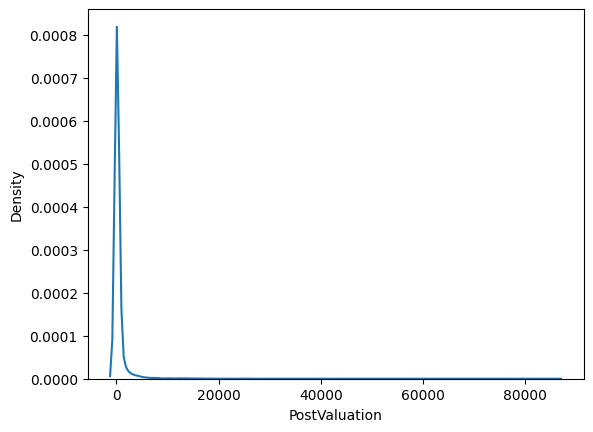

In [30]:
sns.kdeplot(data = deals, x = 'PostValuation')

# Companies exploration


In [6]:
companies.info()
# keep -> companyname, description, keywords, companyfinancingstatus, '' date, employees, year founded, parentcompany, '' id?, 
# companies = companies[['CompanyName', 'Keywords', 'CompanyFinancingStatus', 'CompanyFinancingStatusDate', 'BusinessStatus', ]]

<class 'pandas.core.frame.DataFrame'>
Index: 6487 entries, 10022-68 to 596978-56
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CompanyName                  6487 non-null   object 
 1   CompanyAlsoKnownAs           2767 non-null   object 
 2   CompanyFormerName            1536 non-null   object 
 3   CompanyLegalName             6036 non-null   object 
 4   Description                  6482 non-null   object 
 5   Keywords                     6484 non-null   object 
 6   CompanyFinancingStatus       6487 non-null   object 
 7   CompanyFinancingStatusDate   6336 non-null   object 
 8   TotalRaised                  5483 non-null   float64
 9   TotalRaisedNativeAmount      5471 non-null   float64
 10  TotalRaisedNativeCurrency    5483 non-null   object 
 11  BusinessStatus               6451 non-null   object 
 12  BusinessStatusDate           6451 non-null   object 
 13  OwnershipSt

In [16]:
companies.head()

,CompanyName,CompanyAlsoKnownAs,CompanyFormerName,CompanyLegalName,Description,Keywords,CompanyFinancingStatus,CompanyFinancingStatusDate,TotalRaised,TotalRaisedNativeAmount,...,PrimaryContactPBId,PrimaryContactFirstName,PrimaryContactLastName,PrimaryContactMiddle,PrimaryContactPrefix,PrimaryContactSuffix,PrimaryContact,PrimaryContactTitle,RowID,LastUpdated
CompanyID,,,,,,,,,,,,,,,,,,,,,
10022-68,Boart Longyear,None,None,Boart Longyear Ltd.,Boart Longyear Ltd is a U.S.-based ASX-listed ...,"contract drilling service, down-hole instrumen...",Private Equity-Backed,04/10/2024,3027.643662,3027.643662,...,64236-52P,Jeffrey,Olsen,None,Mr.,None,Jeffrey Olsen,"President, Chief Executive Officer and Board M...",d1f91d5975321ea1e186f197e4d465ab0fde607f532726...,04/20/2024
10026-37,Greenhill & Company,Greenhill,None,"Greenhill & Co, Inc.",Greenhill & Co Inc is an independent investmen...,"financial advice, financings and capital raisi...",Corporate Backed or Acquired,12/01/2023,832.500000,832.500000,...,15456-79P,Gregory,Randolph,G.,Mr.,None,Gregory Randolph,Managing Director,47610123c0f0a724b969bafff9325467dd90cf21f16100...,03/23/2024
10049-68,Kohlberg & Company,Kohlberg,None,"Kohlberg & Co., L.L.C.",Operator of a private equity firm intended to ...,"add-on acquisition, growth capital, pe firm, p...",Venture Capital-Backed,09/05/2023,12.196849,12.196849,...,299670-85P,Marina,Chalik,None,Ms.,None,Marina Chalik,"Vice President, Investor Services",e2b674922c9d7df7c56ed00c0bbe9ebaa9bcf1916e3604...,03/06/2024
10057-15,Corner Bakery Cafe,CBC,None,CBC Restaurant Corporation,Owner and operator of a chain of cafes serving...,"bakery cookies, bakery food items, bakery mixi...",Formerly PE-Backed,06/08/2023,2.551000,2.551000,...,219818-17P,Yeet,Yah,None,Ms.,None,Yeet Yah,Chief Financial Officer,8bb38b598aa57b4f1bb127871327f03f5f76d36a4eddbc...,12/12/2023
10058-41,"Angelo, Gordon & Co.",TPG Angelo Gordon,None,"Angelo, Gordon & Co. L.P.",Provider of alternative investment strategies ...,"alternative investment, fund management, inves...",Corporate Backed or Acquired,11/01/2023,NaN,NaN,...,11481-85P,Michael,Gordon,L.,Mr.,JD,Michael Gordon JD,Co-Founder and non-Executive Chairperson of Pa...,71c4890f48e4b74f9363d5b9403bc2186245f3e9f97992...,05/07/2024


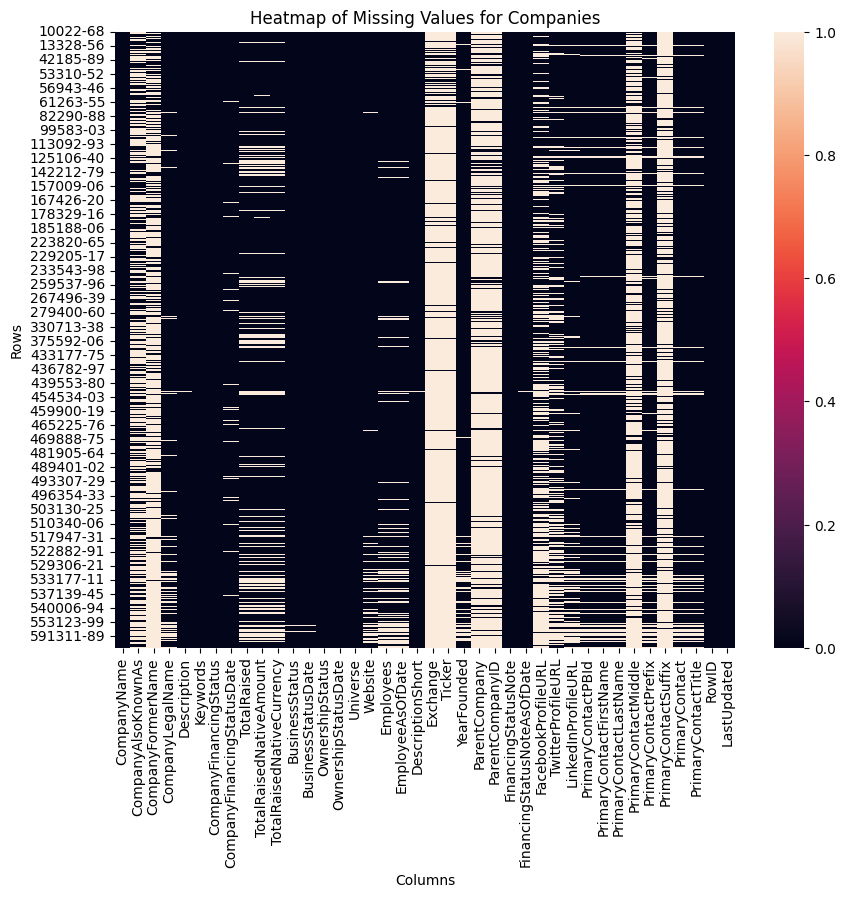

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(companies.isnull(), cbar=True)
plt.title('Heatmap of Missing Values for Companies')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [104]:
companies.select_dtypes(include=['float64']).describe()

,TotalRaised,TotalRaisedNativeAmount,Employees,YearFounded
count,5483.000000,5471.000000,5718.000000,6105.000000
mean,252.004860,260.140719,608.115600,2010.093202
std,1699.408349,1736.271283,6361.911993,20.855640
min,0.010000,0.010000,2.000000,1826.000000
25%,12.492352,12.492352,19.000000,2011.000000
50%,32.300000,32.364995,45.000000,2017.000000
75%,104.639989,104.884997,130.000000,2020.000000
max,79586.000000,79586.000000,400000.000000,2024.000000


In [49]:
companies['Universe'].unique()

array(['Debt Financed, Private Equity, Publicly Listed',
       'Debt Financed, M&A, Publicly Listed',
       'Private Equity, Venture Capital', 'Debt Financed, Private Equity',
       'M&A', 'Debt Financed, M&A, Private Equity, Publicly Listed',
       'Debt Financed, M&A, Private Equity', 'M&A, Private Equity',
       'Private Equity',
       'Debt Financed, M&A, Private Equity, Publicly Listed, Venture Capital',
       'M&A, Publicly Listed',
       'Debt Financed, Private Equity, Publicly Listed, Venture Capital',
       'Debt Financed, Private Equity, Venture Capital',
       'M&A, Private Equity, Publicly Listed', 'M&A, Venture Capital',
       'Debt Financed, Publicly Listed',
       'Debt Financed, Publicly Listed, Venture Capital',
       'Private Equity, Publicly Listed',
       'Debt Financed, Venture Capital', 'Venture Capital',
       'Debt Financed, M&A, Publicly Listed, Venture Capital',
       'Private Equity, Publicly Listed, Venture Capital',
       'Debt Financed, M&

In [40]:
companies.iloc[0]['DescriptionShort']

'Manufacturer of drilling equipment and performance tools intended for mining and drilling companies.'

In [41]:
companies.iloc[0]['Keywords'] # maybe provide information about industry? debts cap

'contract drilling service, down-hole instrumentation, drilling equipment, drilling service, integrated drilling, mine dewatering, production drilling'

In [42]:
companies.iloc[0]['Description'] # drop this maybe, provides same info as descriptionshort and keywords

'Boart Longyear Ltd is a U.S.-based ASX-listed company with large market shares in the Global mineral drilling services and drilling equipment industries. The company operates two divisions: Global Drilling Services and Global Products. The Global Drilling Services division that derives the majority revenue operates for a diverse mining customer base spanning a wide range of commodities, including copper, gold, nickel, zinc, uranium, and other metals and minerals. The Global Products division designs, manufactures and sells drilling equipment, performance tooling, down-hole instrumentation, and parts and services.'

In [37]:
companies['OwnershipStatus'].unique()

array(['Privately Held (backing)', 'Publicly Held',
       'Acquired/Merged (Operating Subsidiary)', 'Acquired/Merged',
       'In IPO Registration', 'Privately Held (no backing)',
       'Out of Business'], dtype=object)

In [44]:
companies['Ticker'].unique()

array([None, 'SN', 'HA', 'SAVE', 'CNGO', 'EGIO', 'USB', 'NRG', 'LXRX',
       'BV', 'CODI', 'SLCA', 'DOOR', 'LL', 'SVV', 'LGF.B', 'HRT', 'SATS',
       'APHD', 'THRY', 'ANSS', 'TAST', 'BTSG', 'NSC', 'PNM', 'OXY', 'PTC',
       'X', 'RAIL', 'HAYN', 'MODN', 'CNSL', 'STER', 'BATL', 'JNPR',
       'SEAC', 'HIBB', 'MIMOQ', 'SIX', 'IRBT', 'DFS', 'CMTL', 'AMED',
       'NI', 'BSY', 'PRFT', 'OCUL', 'SNDA', 'CYTH', 'LCTX', 'ASTC',
       'HRTX', 'AIRC', 'SCX', 'MCBC', 'PBI', 'ABCP', 'PAR', 'CRK', 'SWN',
       'SCND', 'AMNB', 'SHEN', 'VLY', 'MGRC', 'NYCB', 'HTLF', 'NNUP',
       'INRD', 'FNCB', 'VASO', 'NWLI', 'FRBK', 'CVLY', 'WIRE', 'NKTR',
       'TTNP', 'ALE', 'SP', 'DCTH', 'BCLI', 'SSNT', 'LUNA', 'TLRS',
       'TTGT', 'E1BP', 'NLST', 'XTNT', 'FUN', 'CATX', 'AIAD', 'AWH',
       'CYCC', 'PSTV', 'CLRB', 'FFNW', 'SGMT', 'RCM', 'WKHS', 'EVFM',
       'OCX', 'MDBH', 'CALB', 'AGLX', 'TYGO', 'COSM', 'FG', 'IBIO',
       'NSTGQ', 'BDSX', 'TLPH', 'VZIO', '445680', 'MARA', 'KPRX', 'LCID',
       'VT

In [9]:
companies['Exchange'].value_counts()

Exchange
NAS     338
NYS      93
PINX     40
ASE      24
TSX       6
ASX       5
NEOE      4
OTC       3
CNQ       2
OSL       2
TSE       2
LON       2
KRX       1
STU       1
GREY      1
ROCO      1
BATS      1
Name: count, dtype: int64

In [45]:
companies['BusinessStatus'].unique()

array(['Profitable', 'Generating Revenue',
       'Generating Revenue/Not Profitable', 'Bankruptcy: Admin/Reorg',
       'Clinical Trials - Phase 3', 'Clinical Trials - Phase 2',
       'Bankruptcy: Liquidation', 'Clinical Trials - General',
       'Clinical Trials - Phase 1', 'Pre-Clinical Trials', None,
       'Out of Business', 'Clinical Trials - Phase 4',
       'Product In Beta Test', 'Product Development', 'Stealth',
       'Startup', 'Restart'], dtype=object)

In [75]:
companies['OwnershipStatus'].unique()

array(['Privately Held (backing)', 'Publicly Held',
       'Acquired/Merged (Operating Subsidiary)', 'Acquired/Merged',
       'In IPO Registration', 'Privately Held (no backing)',
       'Out of Business'], dtype=object)

In [10]:
companies['CompanyFinancingStatus'].value_counts()

CompanyFinancingStatus
Venture Capital-Backed                   4130
Private Equity-Backed                     709
Corporate Backed or Acquired              560
Formerly VC-backed                        405
Corporation                               266
Formerly PE-Backed                        230
Pending Transaction (M&A)                  74
Pending Transaction (PE)                   36
Pending Transaction (VC)                   28
Failed Transaction (M&A)                   12
Private Debt Financed                      10
Formerly Angel backed                      10
Angel-Backed                                6
Formerly Accelerator/Incubator backed       5
Formerly Private Debt Financed              2
Accelerator/Incubator Backed                2
Failed Transaction (VC)                     2
Name: count, dtype: int64

In [112]:
deals['SiteLocation'].nunique()

1522

In [113]:
companies['FinancingStatusNote'].unique()

array(['The company was acquired by American Industrial Partners through a $371 million LBO on April 10, 2024 through a public-to-private transaction. Through the acquisition, the company strengthens its position in partnership with company management by deploying AIP skills across areas including product engineering, aftermarket, procurement, quality systems, logistics, LEAN, IT, and finance.',
       "The company was acquired by Mizuho Americas for $550 million on December 1, 2023. The acquisition adds complementary services to Mizuho's existing capital markets, banking and private capital advisory capabilities across the corporate and investment bank.",
       'The company raised $12.20 million of venture funding from undisclosed investors on September 5, 2023.',
       ...,
       "The company closed on $8 million of an undisclosed targeted amount of seed funding in a deal led by Hack VC and Polychain Capital on May 1, 2024, putting the company's pre-money valuation at $72 million.

In [13]:
companies.columns

Index(['CompanyName', 'CompanyAlsoKnownAs', 'CompanyFormerName',
       'CompanyLegalName', 'Description', 'Keywords', 'CompanyFinancingStatus',
       'CompanyFinancingStatusDate', 'TotalRaised', 'TotalRaisedNativeAmount',
       'TotalRaisedNativeCurrency', 'BusinessStatus', 'BusinessStatusDate',
       'OwnershipStatus', 'OwnershipStatusDate', 'Universe', 'Website',
       'Employees', 'EmployeeAsOfDate', 'DescriptionShort', 'Exchange',
       'Ticker', 'YearFounded', 'ParentCompany', 'ParentCompanyID',
       'FinancingStatusNote', 'FinancingStatusNoteAsOfDate',
       'FacebookProfileURL', 'TwitterProfileURL', 'LinkedInProfileURL',
       'PrimaryContactPBId', 'PrimaryContactFirstName',
       'PrimaryContactLastName', 'PrimaryContactMiddle',
       'PrimaryContactPrefix', 'PrimaryContactSuffix', 'PrimaryContact',
       'PrimaryContactTitle', 'RowID', 'LastUpdated'],
      dtype='object')

In [15]:
deals['Debts'].isna().sum() 

24737

In [16]:
deals['DebtRaisedInRound'].isna().sum()

26147

In [19]:
deals.columns

Index(['CompanyID', 'CompanyName', 'DealNo', 'DealDate', 'AnnouncedDate',
       'DealSize', 'DealStatus', 'DealSizeStatus', 'PremoneyValuation',
       'PostValuation', 'PostValuationStatus', 'PercentAcquired',
       'RaisedToDate', 'VCRound', 'VCRoundUp_Down_Flat',
       'TotalInvestedCapital', 'InvestorOwnership', 'StockSplit', 'DealType',
       'DealType2', 'DealType3', 'DealClass', 'DealSynopsis',
       'NativeCurrencyOfDeal', 'TotalInvestedEquity', 'AddOn', 'AddOnSponsors',
       'AddOnPlatform', 'TotalNewDebt', 'Debts', 'DebtRaisedInRound',
       'ContingentPayout', 'Employees', 'BusinessStatus', 'FinancingStatus',
       'SiteLocation', 'ExitScope', 'RowID', 'LastUpdated'],
      dtype='object')

In [ ]:
deals[deals['Debts'].isna()][['Debts', 'DebtRaisedInRound', 'TotalNewDebt']]

,Debts,DebtRaisedInRound,TotalNewDebt
DealID,,,
247042-45T,None,NaN,NaN
256383-64T,None,NaN,NaN
256415-23T,None,NaN,NaN
248160-07T,None,NaN,NaN
255261-25T,None,NaN,NaN
...,...,...,...
71551-18T,None,NaN,NaN
195103-18T,None,NaN,NaN
100754-65T,None,NaN,NaN


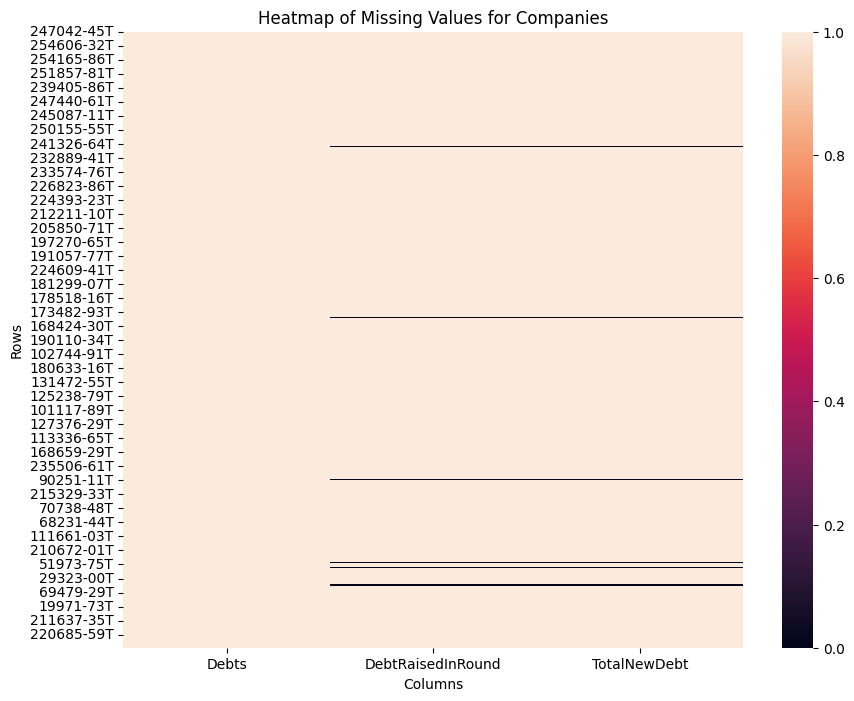

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(deals[deals['Debts'].isna()][['Debts', 'DebtRaisedInRound', 'TotalNewDebt']].isnull(), cbar=True)
plt.title('Heatmap of Missing Values for Companies')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [32]:
deals[(deals['Debts'].isna()) & deals['DebtRaisedInRound'].isna()][['Debts', 'DebtRaisedInRound', 'TotalNewDebt', 'FinancingStatus']]

KeyError: "['Universe'] not in index"

In [30]:
deals[deals['DebtRaisedInRound']==0][['Debts', 'DebtRaisedInRound', 'TotalNewDebt']]

,Debts,DebtRaisedInRound,TotalNewDebt
DealID,,,
243870-85T,None,0.0,NaN
219499-66T,None,0.0,NaN
168245-65T,None,0.0,NaN
